In [211]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [212]:
data = pd.read_csv('/Users/arthurrastelli/Desktop/Assignment/Assignment.csv')
data = data.rename(columns= {'duree': 'expo','nbrtotan': 'freq','nbrtotc': 'nclaims'})
data["sev"] = data['chargtot']/data['freq']
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEPH     163657 non-null  int64  
 1   CODPOSS   163657 non-null  int64  
 2   expo      163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nclaims   163657 non-null  int64  
 5   freq      163657 non-null  float64
 6   chargtot  163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sexp      163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
 16  sev       18345 non-null   float64
dtypes: float64(5), int64(3), object(9)
memory usage: 21.2+ MB


,AGEPH,CODPOSS,expo,lnexpo,nclaims,freq,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc,sev
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110,NaN
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,7.264571
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66,NaN
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110,NaN
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66,NaN


In [213]:
KULbg =  "#116E8A"

SUMMARY STATISTICS:
1. FREQUENCY OF CLAIMS

In [214]:
freq_of_claims = data.groupby('nclaims').agg(tot_obs = ('nclaims','count',),tot_exp=('expo','sum'))
freq_of_claims.reset_index(inplace=True)
freq_of_claims

,nclaims,tot_obs,tot_exp
0,0,145312,128595.947945
1,1,16602,15410.320548
2,2,1562,1447.301370
3,3,162,150.454795
4,4,17,14.328767
5,5,2,1.375342


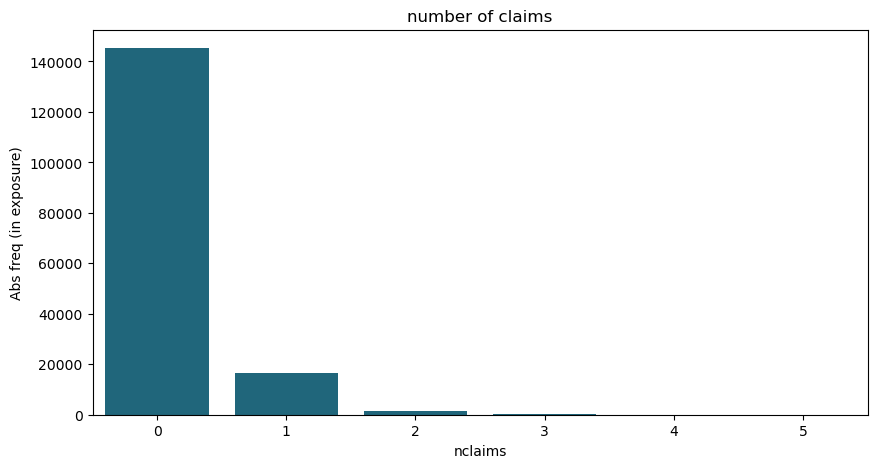

In [215]:
plt.figure(figsize = (10, 5))
sns.barplot(data=freq_of_claims,x='nclaims',y='tot_obs',color=KULbg)
plt.ylabel("Abs freq (in exposure)")
plt.xlabel("nclaims")
plt.title('number of claims')
plt.show()

SUMMARY STATISTICS:
- 2. SEVERITY OF CLAIMS

In [216]:
pos_sev = data[data['sev']>0]
pos_sev

,AGEPH,CODPOSS,expo,lnexpo,nclaims,freq,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc,sev
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,7.264571
12,72,1050,1.000000,0.000000,1,1.000000,1426.379342,2-5,Female,Petrol,Once,Private,No,No,MTPL+++,66-110,1426.379342
15,28,1060,0.956164,-0.044825,2,2.091691,1576.354924,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,753.627217
20,52,1070,0.452055,-0.793952,3,6.636364,8885.396345,6-10,Female,Petrol,Monthly,Private,No,Yes,MTPL,>110,1338.895340
22,56,1082,1.000000,0.000000,1,1.000000,619.733812,0-1,Female,Petrol,Once,Private,No,No,MTPL+,66-110,619.733812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163624,43,9700,1.000000,0.000000,2,2.000000,4270.511330,>10,Male,Petrol,Once,Private,No,No,MTPL,<66,2135.255665
163636,58,9820,1.000000,0.000000,1,1.000000,145.017712,>10,Male,Petrol,Once,Private,No,No,MTPL,<66,145.017712
163642,27,9890,1.000000,0.000000,1,1.000000,271.220305,2-5,Male,Petrol,Once,Private,No,No,MTPL+++,<66,271.220305
163655,58,9970,1.000000,0.000000,1,1.000000,3177.994988,>10,Male,Petrol,Once,Private,Yes,No,MTPL,<66,3177.994988


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ValueError: output array is read-only

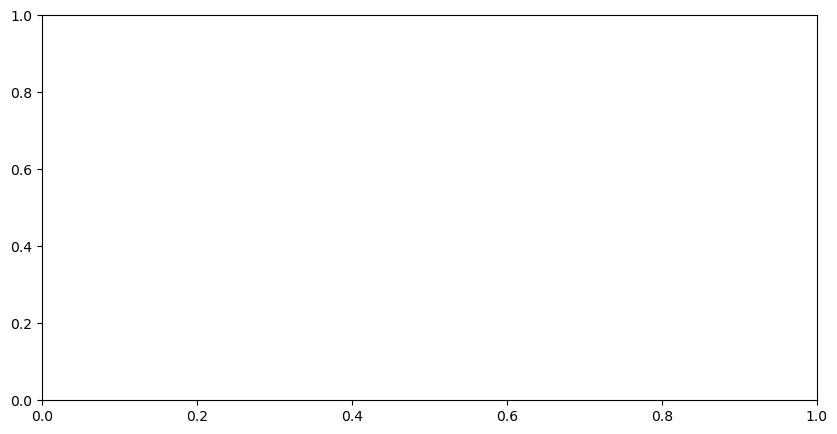

In [217]:
plt.figure(figsize = (10, 5))
sns.histplot(data=pos_sev,x='sev',stat='count',bin=50,color=KULbg)
plt.ylabel("Abs Freq")
plt.xlabel("nclaims")
plt.xlim(0,20000)
plt.title('number of claims')
plt.show()

FUNCTION

In [ ]:
def grouped(x):
    grouped = data.groupby(x).agg({
    'nclaims':'sum',
    'expo': 'sum',
    'chargtot': 'sum'
    })
    grouped['absph'] = data[x].value_counts()
    grouped['relph'] = grouped['absph']/grouped['absph'].sum()
    grouped['emp_freq'] = grouped['nclaims']/grouped['expo']
    grouped.reset_index(inplace=True)
    return   grouped

Info on the data typs

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AGEPH     163657 non-null  int64  
 1   CODPOSS   163657 non-null  int64  
 2   expo      163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nclaims   163657 non-null  int64  
 5   freq      163657 non-null  float64
 6   chargtot  163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sexp      163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
 16  sev       18345 non-null   float64
dtypes: float64(5), int64(3), object(9)
memory usage: 21.2+ MB


Bin CODPOSS

In [ ]:
def categorize_postal_code(code):
    if 1000 <= code <= 1299:
        return 'BHG'
    elif 1300 <= code <= 1499:
        return 'WB'
    elif 1500 <= code <= 1999 or 3000 <= code <= 3499:
        return 'VB'
    elif 2000 <= code <= 2999:
        return 'ANT'
    elif 3500 <= code <= 3999:
        return 'LIM'
    elif 4000 <= code <= 4999:
        return 'LUI'
    elif 5000 <= code <= 5999:
        return 'NAM'
    elif 6000 <= code <= 6599 or 7000 <= code <= 7999:
        return 'HEN'
    elif 6600 <= code <= 6999:
        return 'LUX'
    elif 8000 <= code <= 8999:
        return 'WV'
    elif 9000 <= code <= 9999:
        return 'OV'
    else:
        return 'Unknown'
    
data['region'] = data['CODPOSS'].apply(categorize_postal_code)
data

,AGEPH,CODPOSS,expo,lnexpo,nclaims,freq,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc,sev,region
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110,NaN,BHG
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,7.264571,BHG
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66,NaN,BHG
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110,NaN,BHG
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66,NaN,BHG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163652,50,9960,1.000000,0.000000,0,0.000000,0.000000,2-5,Male,Petrol,Once,Private,No,No,MTPL+,<66,NaN,OV
163653,86,9960,1.000000,0.000000,0,0.000000,0.000000,6-10,Male,Petrol,Once,Private,No,No,MTPL,<66,NaN,OV
163654,64,9960,1.000000,0.000000,0,0.000000,0.000000,2-5,Male,Petrol,Twice,Private,No,No,MTPL,<66,NaN,OV
163655,58,9970,1.000000,0.000000,1,1.000000,3177.994988,>10,Male,Petrol,Once,Private,Yes,No,MTPL,<66,3177.994988,OV


In [224]:
categorical_variables = ['agecar','sexp','fuelc','split','usec','fleetc','sportc','coverp','powerc']
data_dummies = pd.get_dummies(data, columns=categorical_variables)

In [225]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AGEPH              163657 non-null  int64  
 1   CODPOSS            163657 non-null  int64  
 2   expo               163657 non-null  float64
 3   lnexpo             163657 non-null  float64
 4   nclaims            163657 non-null  int64  
 5   freq               163657 non-null  float64
 6   chargtot           163657 non-null  float64
 7   sev                18345 non-null   float64
 8   agecar_0-1         163657 non-null  bool   
 9   agecar_2-5         163657 non-null  bool   
 10  agecar_6-10        163657 non-null  bool   
 11  agecar_>10         163657 non-null  bool   
 12  sexp_Female        163657 non-null  bool   
 13  sexp_Male          163657 non-null  bool   
 14  fuelc_Gasoil       163657 non-null  bool   
 15  fuelc_Petrol       163657 non-null  bool   
 16  sp

In [226]:
#data_dummies.drop(columns=['agecar_6-10','sexp_Male', 'fuelc_Petrol','split_Once', 'usec_Professional', 'fleetc_No', 'sportc_No'])

GENERALIZED LINEAR MODELS: FREQUENCY

In [232]:
glm_freq_age = smf.glm('freq ~ AGEPH + C(agecar, Treatment(reference= "6-10")) + C(powerc, Treatment(reference= "<66")) + C(coverp, Treatment(reference= "MTPL")) + C(fuelc, Treatment(reference= "Petrol"))', data=data, exposure=data.expo,family=sm.families.Poisson(link=sm.families.links.log())).fit()
print(glm_freq_age.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   freq   No. Observations:               163657
Model:                            GLM   Df Residuals:                   163647
Model Family:                 Poisson   Df Model:                            9
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -92825.
Date:                Sun, 19 May 2024   Deviance:                   1.4593e+05
Time:                        22:39:39   Pearson chi2:                 5.71e+07
No. Iterations:                     7   Pseudo R-squ. (CS):            0.01544
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

GENERALIZED LINEAR MODELS: SEVERITY

In [ ]:
glm_freq_sev = smf.glm('sev ~ AGEPH + agecar + powerc + coverp + fuelc + region', data=data, exposure=data.expo,family=sm.families.Poisson(link=sm.families.links.log())).fit()
print(glm_freq_age.summary())

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               163657
Model:                            GLM   Df Residuals:                   163634
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63023.
Date:                Sun, 19 May 2024   Deviance:                       88212.
Time:                        20:32:30   Pearson chi2:                 1.95e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01195
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In